Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

Read csv

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Check for duplicates and drop same if any

In [5]:
print(data.duplicated().sum())

1


In [6]:
data.loc[data.duplicated(keep=False), :]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
data=data.drop_duplicates().reset_index(drop=True)

Create a new column to aggregate the bmi values

In [8]:
data['bmi_level'] = data['bmi'].apply(
    lambda x: 'high' if x > 28
    else ('medium' if 25<x<28 else 'low') 
)

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_level
0,19,female,27.900,0,yes,southwest,16884.92400,medium
1,18,male,33.770,1,no,southeast,1725.55230,High
2,28,male,33.000,3,no,southeast,4449.46200,High
3,33,male,22.705,0,no,northwest,21984.47061,low
4,32,male,28.880,0,no,northwest,3866.85520,High


In [10]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Frequency Distribution Plots

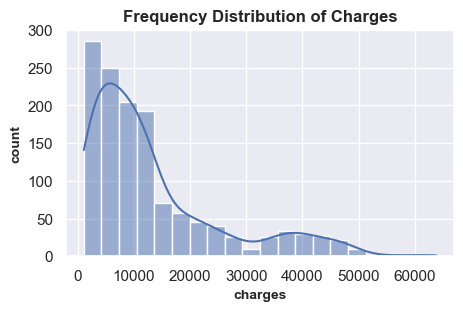

In [11]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data['charges'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('charges', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of Charges', 
            fontsize=12, fontweight='bold')
plt.show()

Some outliers on the upper end of the charges label

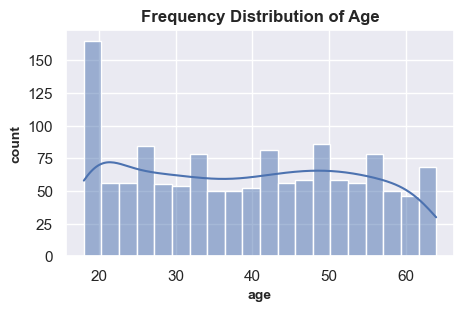

In [12]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data['age'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of Age', 
            fontsize=12, fontweight='bold')
plt.show()

There seem to be a fair distribution of the age feature in that there is no dominant age range in the dataset

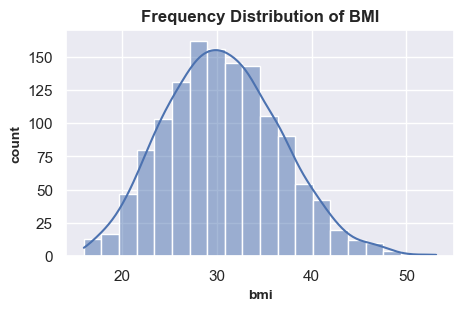

In [13]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data['bmi'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('bmi', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of BMI', 
            fontsize=12, fontweight='bold')
plt.show()

The bmi attribute, to a great extent, is normally distributed

Scatter Plots

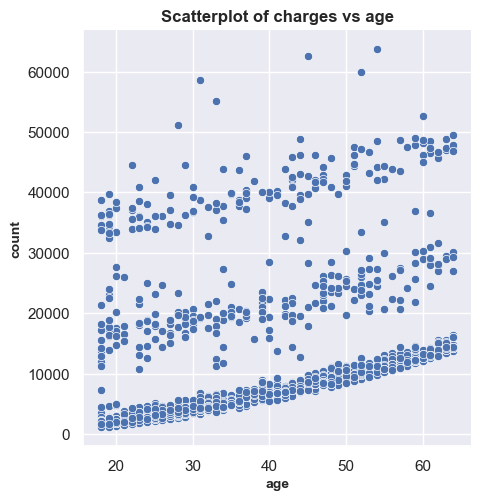

In [14]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age', 
            fontsize=12, fontweight='bold')
plt.show()

It is clear there is some relationship between age and charges, however it seems there are different categories from this plot. Let's investigate what could be responsible for the different categories.

First, let's test with the sex attribute.

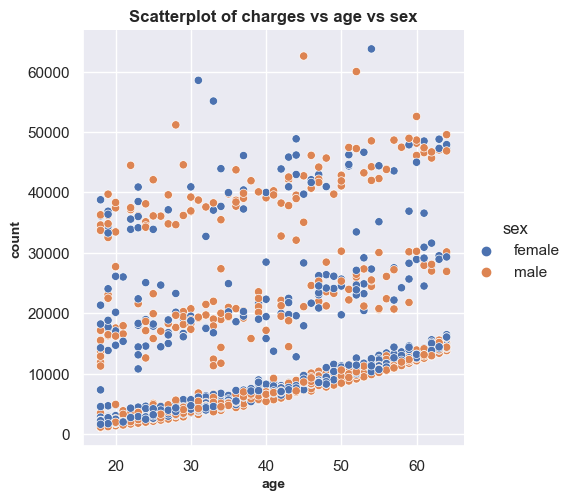

In [15]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='sex', 
            data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs sex', 
            fontsize=12, fontweight='bold')
plt.show()

There is a mixture of both sexes in the three catgories from the plot.

Next, we test with the smoker attribute.

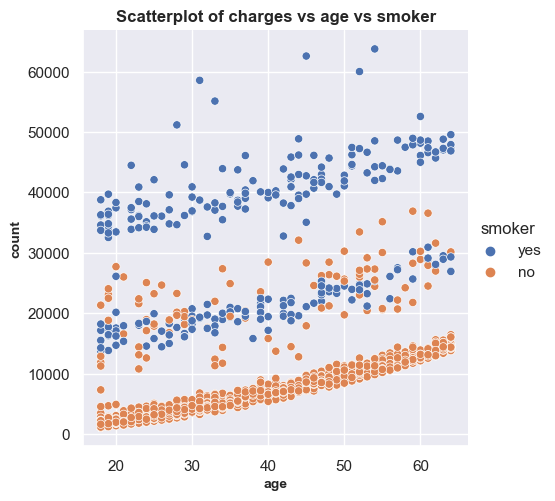

In [16]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='smoker', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs smoker', 
            fontsize=12, fontweight='bold')
plt.show()

We can see some uniformity in the three categories from the plot. One catgory has mostly non smokers, the second has mostly smokers and the third has both smokers and non smokers.

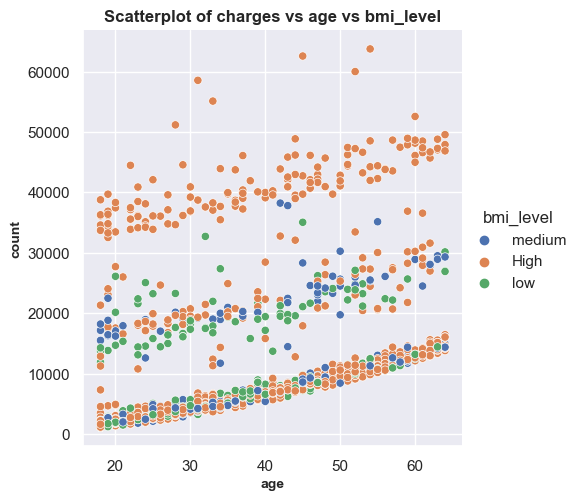

In [17]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='bmi_level', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs bmi_level', 
            fontsize=12, fontweight='bold')
plt.show()

The bmi_level attribute gives us some information with respect to the bmi_level associated with the charges label. Almost all the charges above 30,000 is associated with high bmi_level. 

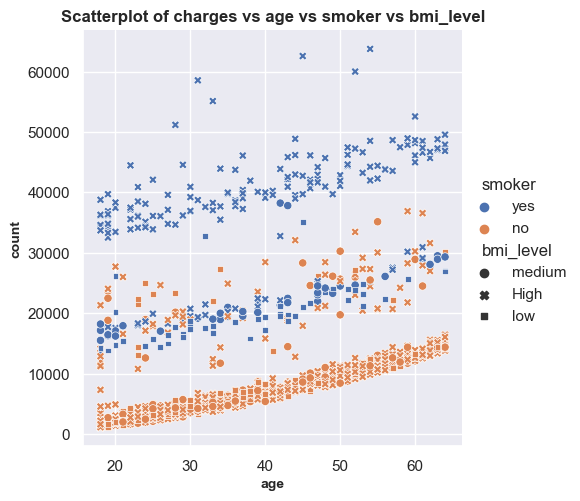

In [18]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='smoker', style='bmi_level', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs smoker vs bmi_level', 
            fontsize=12, fontweight='bold')
plt.show()

Let's use the smoker attribute and the bmi_level attribute to find other interesting factos from the categories. From this plot we can see that almost all high charges are associated with high bmi_level and smoker. We can also establish that lower charges are associated with mostly non smoker and all classes of bmi_level and age attributes.

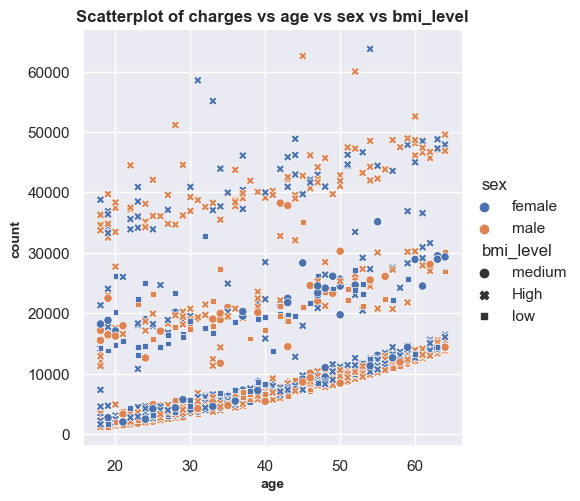

In [19]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='sex', style='bmi_level', data=data)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Scatterplot of charges vs age vs sex vs bmi_level', 
            fontsize=12, fontweight='bold')
plt.show()

We however cannot establish a similar relationship is we substitute the smoker attribute with the sex attribute. Though we can see that higher charges are associated with high bmi_level, the sex attribute cannot be used to distinguish the categories in any way.

Outliers

From the frequency distribution of the charges attirbute, we observed there are low occuring high charges in the frequency plot. We can analyze these outliers to establish what are the contributory factors to these high charges.

First, we need to establish a cut off for the outliers. For the sake of this analysis, our cut off will be the 80th quantile of the charges attribute.

In [20]:
data.charges.quantile(0.8)

20269.216957999997

We can extract a dataframe based on the charges above the 80th quantile and 

In [21]:
data_80th_q = data[data['charges']>data.charges.quantile(0.8)]
data_80th_q.reset_index()
data_80th_q.describe()

,age,bmi,children,charges
count,268.000000,268.000000,268.000000,268.000000
mean,42.667910,32.221194,1.145522,34243.269119
std,13.868219,5.726242,1.127333,9531.302451
min,18.000000,17.765000,0.000000,20277.807510
25%,31.000000,27.822500,0.000000,25040.131092
50%,45.000000,32.062500,1.000000,34833.763500
75%,54.000000,36.122500,2.000000,41238.271812
max,64.000000,52.580000,4.000000,63770.428010


The charges on this dataset for obvious reasons are the highest from the main dataset. However, the other numerical attributes do not follow the same pattern. Do these attributes follow the same pattern as we saw with the main dataset? Let's check that out. 

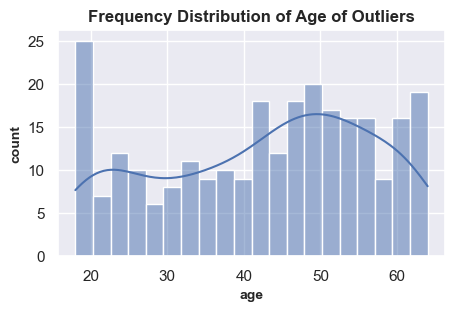

In [22]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data_80th_q['age'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of Age of Outliers', 
            fontsize=12, fontweight='bold')
plt.show()

Just like we saw in the general dataset, there is no dominant age among the ages in the outliers. In other words, the high charges are not peculiar to any age or age group. 

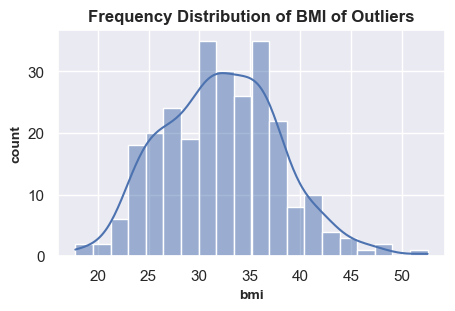

In [23]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.histplot(data_80th_q['bmi'], bins=20, kde=True)
plt.ylabel('count', fontsize=10, fontweight='bold')
plt.xlabel('bmi', fontsize=10, fontweight='bold')
plt.title('Frequency Distribution of BMI of Outliers', 
            fontsize=12, fontweight='bold')
plt.show()

We also find that there is no bmi value(s) that is dominant in the outliers.

So we have established that we can not associate the outliers (higher premium charges) with bmi levels or age. Let's see if smoker, sex and children attributes can be used to understand what contributes to the high charges.

First, we investigate the age attributes to see if we can find any segmentation like we did with the general dataset.

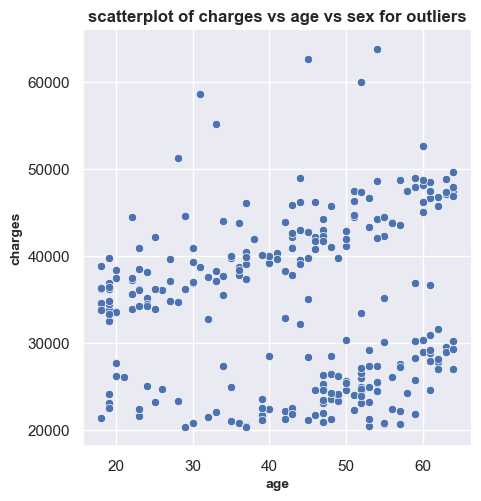

In [24]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', data=data_80th_q)
plt.ylabel('charges', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('scatterplot of charges vs age vs sex for outliers', 
            fontsize=12, fontweight='bold')
plt.show()

The outliers do not foloow the general dataset in this analysis. As seen in the plot, two clusters of values are visible, whereas for the general dataset, we see three distinct clusters.

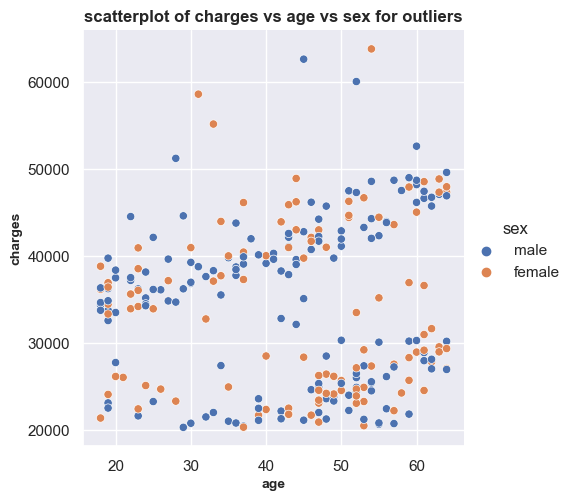

In [25]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='sex', data=data_80th_q)
plt.ylabel('charges', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('scatterplot of charges vs age vs sex for outliers', 
            fontsize=12, fontweight='bold')
plt.show()

Let's test the dataset with the sex attribute to establish if this attribute is responsible for the two clusters we have in the outliers scatter plot. The plot above shows that the sex attribute does not separate the dataset into the clusters we observed in the earlier scatter plot.

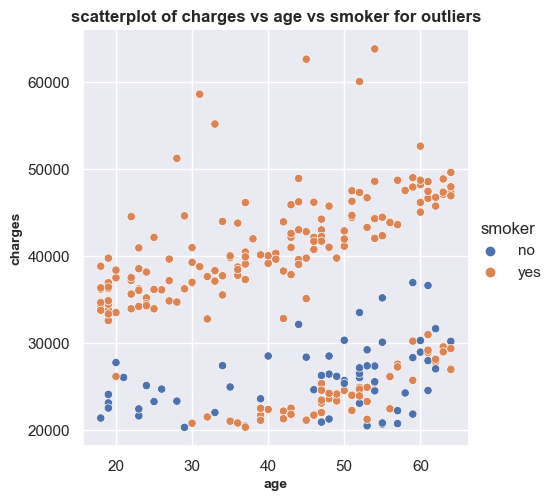

In [26]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='smoker', 
            data=data_80th_q)
plt.ylabel('charges', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('scatterplot of charges vs age vs smoker for outliers', 
            fontsize=12, fontweight='bold')
plt.show()

With the smoker attribute we find that the upper cluster is clearly associated with smokers while the lower cluster has a mix of smokers and non smokers. There is a further split in the lower cluster. We can observe that the younger ages in the lower cluster are non smokers while the older ages have a blend of smokers and non smokers.

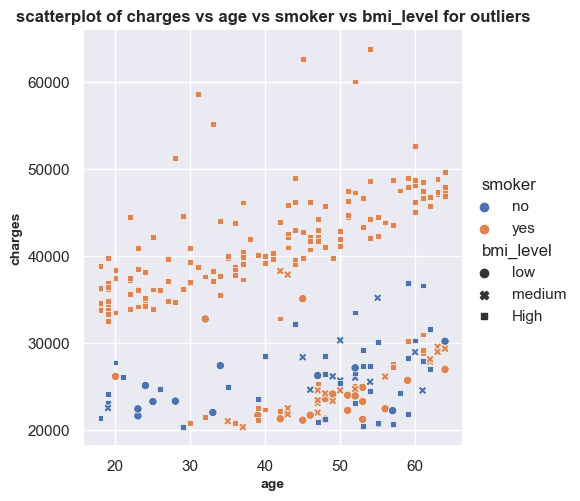

In [27]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='smoker', 
            style = 'bmi_level', data=data_80th_q)
plt.ylabel('charges', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('scatterplot of charges vs age vs smoker vs bmi_level for outliers', 
            fontsize=12, fontweight='bold')
plt.show()

Let us add the bmi_level attribute to investigate how the observation from the previous plot responds elaborates the clusters. We can see that the the upper cluster is mostly associated with smokers who have high bmi_level. There is no clear association of any of the bmi_levels with smokers or non-smokers in the lower cluster.

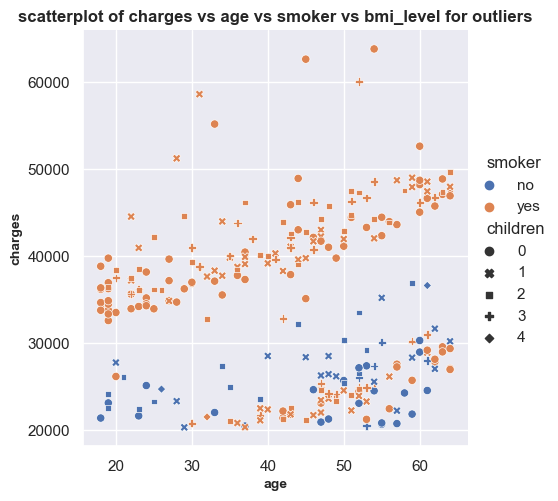

In [28]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='age', y='charges', hue='smoker', 
            style = 'children', data=data_80th_q)
plt.ylabel('charges', fontsize=10, fontweight='bold')
plt.xlabel('age', fontsize=10, fontweight='bold')
plt.title('scatterplot of charges vs age vs smoker vs bmi_level for outliers', 
            fontsize=12, fontweight='bold')
plt.show()

We substitute the bmi_levels with the children attribute and we can observe no clear association between any of the clusters and the number of children.

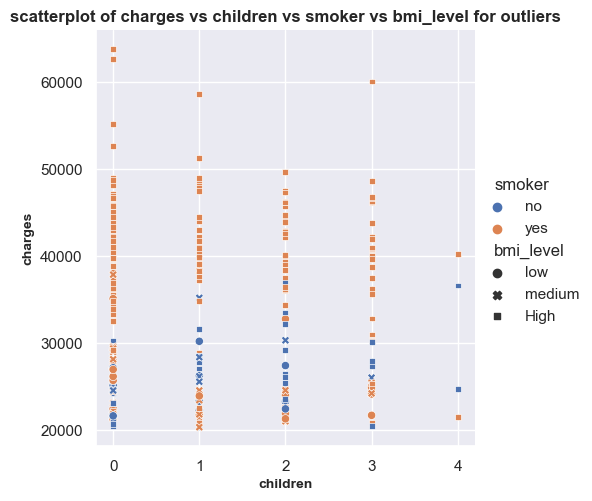

In [29]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 100})
sns.relplot(x='children', y='charges', hue='smoker', 
            style='bmi_level', data=data_80th_q)
plt.ylabel('charges', fontsize=10, fontweight='bold')
plt.xlabel('children', fontsize=10, fontweight='bold')
plt.title('scatterplot of charges vs children vs smoker vs bmi_level for outliers', 
            fontsize=12, fontweight='bold')
plt.show()

We can observe from this plot that increasing the number of children is likely associated with the bmi level. We can also see that the higher charges in the outliers  are mostly associated with smokers who have high bmi level.

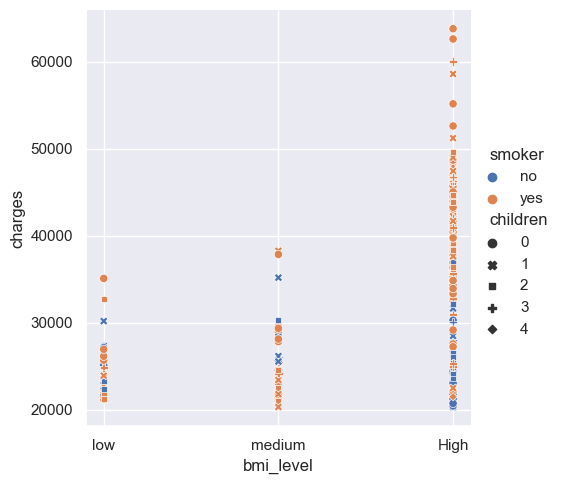

In [30]:
sns.relplot(x='bmi_level', y='charges', hue='smoker', 
            style='children', data=data_80th_q)

Swapping the number of children and the bmi_level attributes in the previous plot, we can observe that the high bmi_level class dominates the outliers dataset. However, there is no indication of any association between the number of children and the bmi level as seen earlier in this notebook.

Average Charges Analysis

We would use the averages charges of the groups in the dataset to simplify the comparison between the groups. Since we do not know in clear terms if the distribution of the dataset is similar to that in the reral world, using frequency of occurrence may give misleading results.

Our first comparison is that between male and female in the dataset.What is the charge for an average man versus an average woman?

In [52]:
result_group_by_sex = data.groupby('sex')['charges'].mean().round(2)
result_group_by_sex  = pd.DataFrame(result_group_by_sex )
result_group_by_sex .reset_index(inplace=True)
result_group_by_sex.rename(columns = {'charges':'avg_charges'},
inplace=True)
result_group_by_sex 

,sex,avg_charges
0,female,12569.58
1,male,13975.00


<AxesSubplot:xlabel='sex', ylabel='avg_charges'>

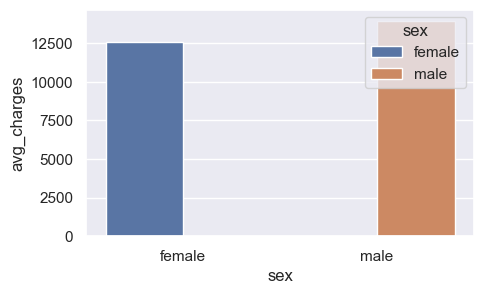

In [53]:
sns.barplot(x='sex', y='avg_charges', hue='sex', 
                data=result_group_by_sex, 
                )

As far as our dataset goes, a typical male pays more charges than a typical female.

Next, we group the sexes by the 'smoker' attribute. How is the average charges for a female smoker different from a female non-smoker?

In [55]:
result_group_by_sex_smoker = data.groupby(['sex', 'smoker'])['charges'].mean().round(2)
result_group_by_sex_smoker  = pd.DataFrame(result_group_by_sex_smoker)
result_group_by_sex_smoker.reset_index(inplace=True)
result_group_by_sex_smoker.rename(columns = {'charges':'avg_charges'},
inplace=True)
result_group_by_sex_smoker

,sex,smoker,avg_charges
0,female,no,8762.30
1,female,yes,30679.00
2,male,no,8099.70
3,male,yes,33042.01


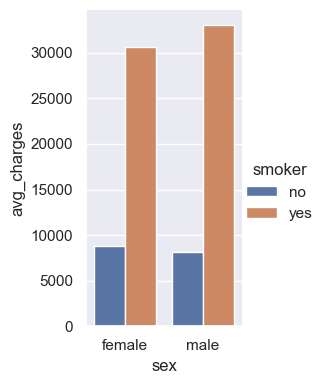

In [58]:
sns.catplot(x='sex', y='avg_charges', hue='smoker', 
                data=result_group_by_sex_smoker, kind="bar",
                height=4, aspect=.7)

As expected, the male and female smokers pay more charges on average than their non smoking counterparts. However, we can notice that whereas the average female non-smoker pays slightly more than the average male non-smoker, a female smoker pays less than a male smoker when we compare their average charges.

Now, we can look at grouping the sexes with their bmi levels.

In [62]:
result_group_by_sex_bmi = data.groupby(['sex', 'bmi_level'])['charges'].mean().round(2)
result_group_by_sex_bmi  = pd.DataFrame(result_group_by_sex_bmi)
result_group_by_sex_bmi.reset_index(inplace=True)
result_group_by_sex_bmi.rename(columns = {'charges':'avg_charges'},
inplace=True)
result_group_by_sex_bmi

,sex,bmi_level,avg_charges
0,female,High,13360.30
1,female,low,10901.18
2,female,medium,11637.54
3,male,High,15846.02
4,male,low,9694.09
5,male,medium,10673.04


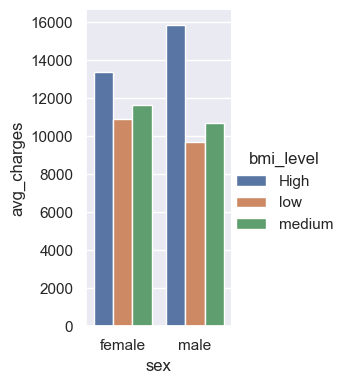

In [64]:
sns.catplot(x='sex', y='avg_charges', hue='bmi_level', 
                data=result_group_by_sex_bmi, kind="bar",
                height=4, aspect=.7)

As expected, the plot shows that charges increases as the bmi level increases for both sexes. We can see from this plot that males with high bmi levels pay higher charges than females with similar bmi levels. We also notice that females with medium and low bmi levels pay more than the males in the same bmi categories.

Our last comaparison groups will look at a combination of sexes, smoker and bmi_level attributes.

In [60]:
result1 = data.groupby(['sex', 'smoker', 'bmi_level'])['charges'].mean()
result1 = pd.DataFrame(result1)
result1.reset_index(inplace=True)
result1.rename(columns={'charges':'avg_charges'}, inplace=True)
result1

,sex,smoker,bmi_level,avg_charges
0,female,no,High,8822.402475
1,female,no,low,8111.948559
2,female,no,medium,9236.001568
3,female,yes,High,38714.903279
4,female,yes,low,19704.711917
5,female,yes,medium,22924.744192
6,male,no,High,8508.589245
7,male,no,low,6989.573057
8,male,no,medium,7668.610185
9,male,yes,High,37923.243594


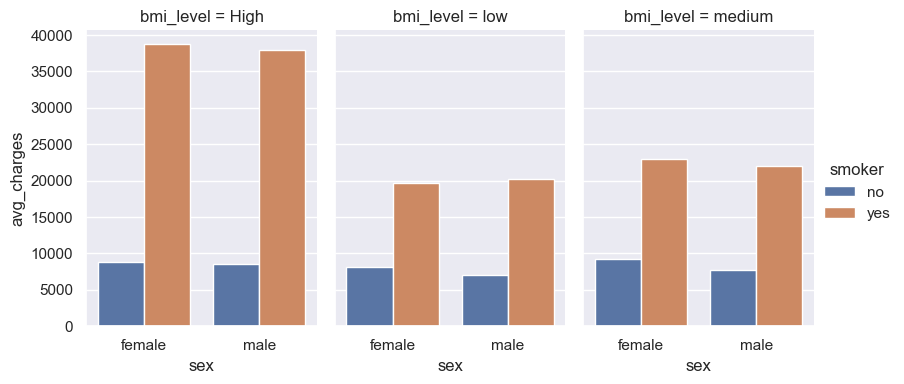

In [75]:
sns.catplot(x='sex', y='avg_charges',
                hue='smoker', col='bmi_level',
                data=result1, kind="bar",
                height=4, aspect=.7)

The plot here shows that the average charges for males and females in the same group are reasonably close. The average for a male smoker with high bmi level is quite close to that of a woman with the same features. 

We also notice that the charges for non smokers is not highly influenced by the bmi level like it does for the smokers in our dataset.

We can also apply the average analysis to our 'outliers' and see if there are some patterns to the groups we have recognized in this section of our dataset.

In [65]:
result2_group_by_sex = data_80th_q.groupby('sex')['charges'].mean().round(2)
result2_group_by_sex  = pd.DataFrame(result2_group_by_sex )
result2_group_by_sex .reset_index(inplace=True)
result2_group_by_sex.rename(columns = {'charges':'avg_charges'},
inplace=True)
result2_group_by_sex 

,sex,avg_charges
0,female,33518.78
1,male,34763.41


<AxesSubplot:xlabel='sex', ylabel='avg_charges'>

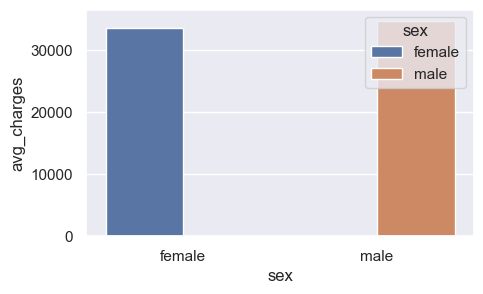

In [66]:
sns.barplot(x='sex', y='avg_charges', hue='sex', 
                data=result2_group_by_sex, 
                )

In [67]:
result2_group_by_sex_smoker = data_80th_q.groupby(['sex', 'smoker'])['charges'].mean().round(2)
result2_group_by_sex_smoker  = pd.DataFrame(result2_group_by_sex_smoker)
result2_group_by_sex_smoker .reset_index(inplace=True)
result2_group_by_sex_smoker.rename(columns = {'charges':'avg_charges'},
inplace=True)
result2_group_by_sex_smoker

,sex,smoker,avg_charges
0,female,no,26764.03
1,female,yes,35990.03
2,male,no,25098.01
3,male,yes,37064.70


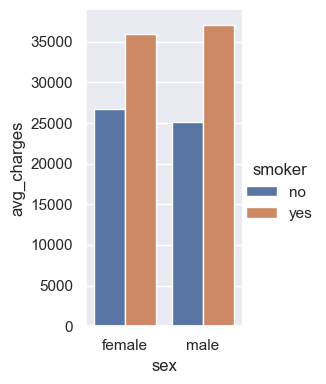

In [68]:
sns.catplot(x='sex', y='avg_charges', hue='smoker', 
                data=result2_group_by_sex_smoker, kind="bar",
                height=4, aspect=.7)

In [69]:
result2_group_by_sex_bmi = data_80th_q.groupby(['sex', 'bmi_level'])['charges'].mean().round(2)
result2_group_by_sex_bmi  = pd.DataFrame(result2_group_by_sex_bmi)
result2_group_by_sex_bmi.reset_index(inplace=True)
result2_group_by_sex_bmi.rename(columns = {'charges':'avg_charges'},
inplace=True)
result2_group_by_sex_bmi

,sex,bmi_level,avg_charges
0,female,High,37817.50
1,female,low,24660.05
2,female,medium,25542.27
3,male,High,37087.11
4,male,low,24260.84
5,male,medium,26601.98


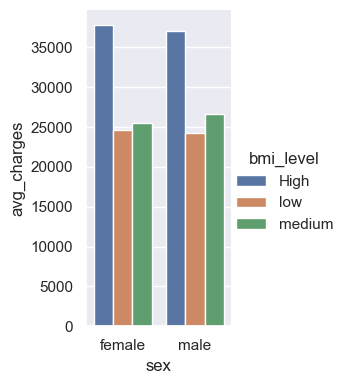

In [70]:
sns.catplot(x='sex', y='avg_charges', hue='bmi_level', 
                data=result2_group_by_sex_bmi, kind="bar",
                height=4, aspect=.7)

In [71]:
result2 = data_80th_q.groupby(['sex', 'smoker', 'bmi_level'])['charges'].mean()
result2 = pd.DataFrame(result2)
result2.reset_index(inplace=True)
result2.rename(columns={'charges':'avg_charges'}, inplace=True)
result2

,sex,smoker,bmi_level,avg_charges
0,female,no,High,27104.102489
1,female,no,low,24385.575223
2,female,no,medium,28122.247860
3,female,yes,High,41261.094777
4,female,yes,low,24809.757956
5,female,yes,medium,24510.281230
6,male,no,High,24984.251445
7,male,no,low,24872.770076
8,male,no,medium,25778.257124
9,male,yes,High,39392.421764


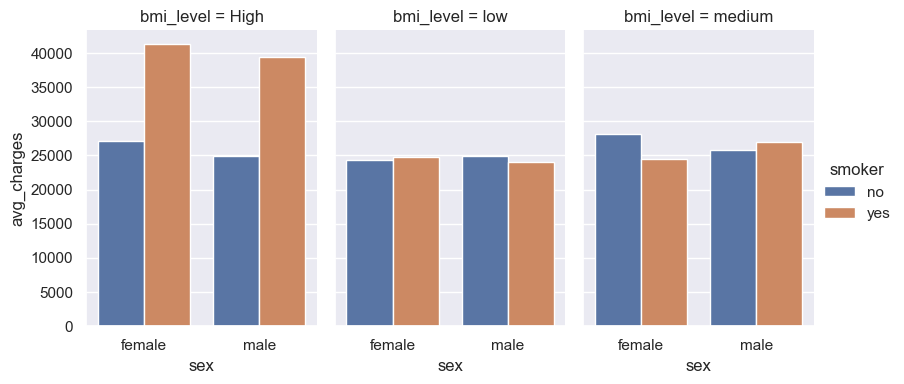

In [73]:
sns.catplot(x='sex', y='avg_charges',
                hue='smoker', col='bmi_level',
                data=result2, kind="bar",
                height=4, aspect=.7)